In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [24]:
templates = []
files = glob.glob("templates/*.png")
for myFile in files:
    print(myFile)
    image = cv2.imread(myFile, 0)
    templates.append(image)

print('templates shape:', np.array(templates).shape)

templates\k1bs4.png
templates\k1bs6.png
templates\k2bs4.png
templates\k2bs6.png
templates\k3bs4.png
templates\k3bs6.png
templates shape: (6,)


In [25]:
models = []
files = glob.glob("data/*.jpg")
for myFile in files:
    print(myFile)
    image = cv2.imread(myFile, 0)
    models.append(image)

print('models shape:', np.array(models).shape)

data\IMG_20200701_173156.jpg
data\IMG_20200701_173200.jpg
data\IMG_20200701_173205.jpg
data\IMG_20200701_173210.jpg
data\IMG_20200701_173221.jpg
data\IMG_20200701_173227.jpg
models shape: (6, 3000, 4000)


In [20]:
# k1bs4t = cv2.imread('templates/k1bs4.png')
# k2bs4t = cv2.imread('templates/k2bs4.png')
# k3bs4t = cv2.imread('templates/k3bs4.png')

# k1bs6t = cv2.imread('templates/k1bs6.png')
# k2bs6t = cv2.imread('templates/k2bs6.png')
# k3bs6t = cv2.imread('templates/k3bs6.png')

In [11]:
# k1bs4 = cv2.imread('data/IMG_20200701_173227.jpg')
# k2bs4 = cv2.imread('data/IMG_20200701_173221.jpg')
# k3bs4 = cv2.imread('data/IMG_20200701_173210.jpg')

# k1bs6 = cv2.imread('data/IMG_20200701_173156.jpg')
# k2bs6 = cv2.imread('data/IMG_20200701_173200.jpg')
# k3bs6 = cv2.imread('data/IMG_20200701_173205.jpg')

In [46]:
# Making this crop as a template

template = templates[1]
print(template)
print(template.shape)
w, h = template.shape[::-1]

# plt.imshow(template)

[[ 80  76  73 ... 186 185 184]
 [ 74  76  78 ... 185 185 184]
 [ 68  78  82 ... 184 184 183]
 ...
 [ 67  51  70 ... 179 178 181]
 [ 58  52  63 ... 177 178 179]
 [ 57  66  52 ... 176 178 178]]
(1600, 1500)


NameError: name 'meth' is not defined

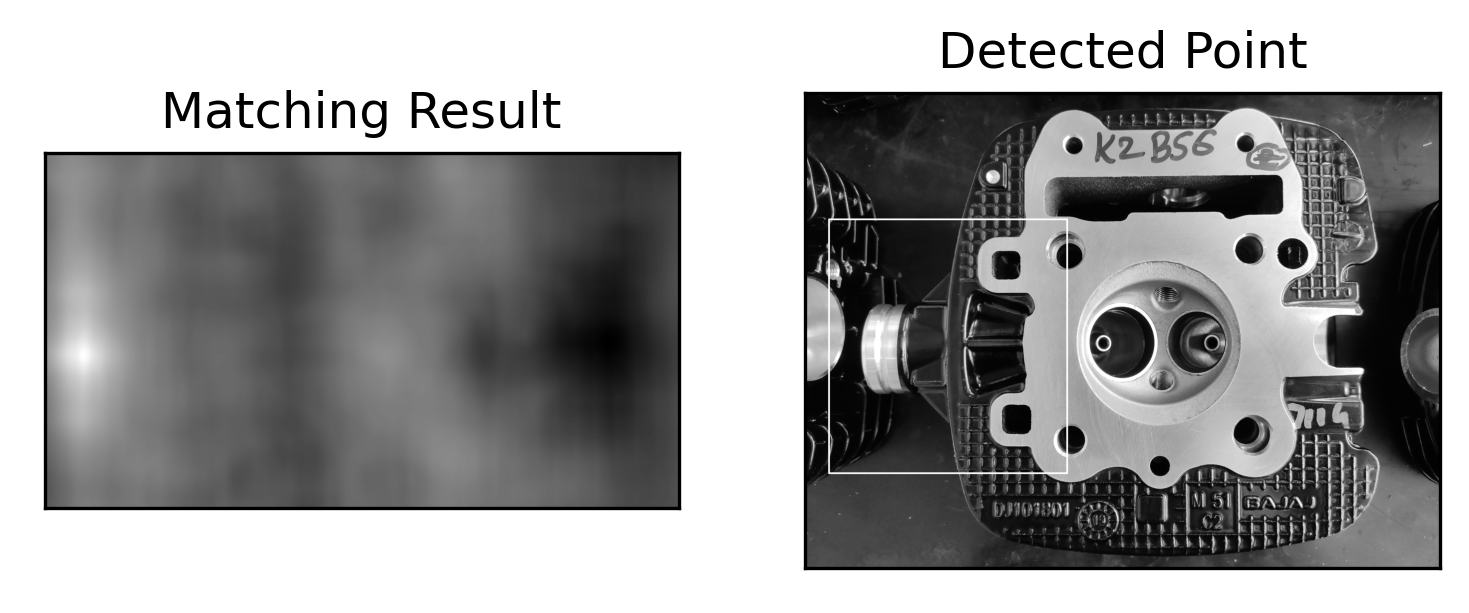

In [47]:
temp = templates[1]
model = models[1]

inim = model.copy()
w, h = temp.shape[::-1]
        
res = cv2.matchTemplate(inim,temp,method)
res = cv2.matchTemplate(model,temp,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
score.append(max_val)
        
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(inim,top_left, bottom_right, 255, 10)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(inim,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)
plt.show()

In [50]:
score = []
method = eval('cv2.TM_CCOEFF')
for model in models:
    for temp in templates:
#         inim = model.copy()
#         w, h = temp.shape[::-1]
        
#         res = cv2.matchTemplate(inim,temp,method)
        res = cv2.matchTemplate(model,temp,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        score.append(max_val)
        
#         top_left = max_loc
#         bottom_right = (top_left[0] + w, top_left[1] + h)
#         cv2.rectangle(inim,top_left, bottom_right, 255, 10)
#         plt.subplot(121),plt.imshow(res,cmap = 'gray')
#         plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
#         plt.subplot(122),plt.imshow(inim,cmap = 'gray')
#         plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
#         plt.suptitle(meth)
#         plt.show()
#         print(max_val)
    
print(score)

[4062351360.0, 8968998912.0, 4269018880.0, 5627717120.0, 4895226368.0, 4397677568.0, 5092765184.0, 7899453952.0, 4948922368.0, 9571482624.0, 5371525632.0, 5923732992.0, 4721982464.0, 4514654208.0, 4662830592.0, 5138675712.0, 6217209856.0, 11421582336.0, 5947679232.0, 4246504960.0, 5387582464.0, 3911382016.0, 8562710016.0, 6529548288.0, 6848501760.0, 4740285440.0, 7911001088.0, 3791641600.0, 5538628096.0, 4525528576.0, 8549310976.0, 3165976320.0, 4931930624.0, 3100783872.0, 5671646208.0, 4577802240.0]


In [51]:
score = np.array(score)
score = score.reshape(6, 6)
print(score)

[[4.06235136e+09 8.96899891e+09 4.26901888e+09 5.62771712e+09
  4.89522637e+09 4.39767757e+09]
 [5.09276518e+09 7.89945395e+09 4.94892237e+09 9.57148262e+09
  5.37152563e+09 5.92373299e+09]
 [4.72198246e+09 4.51465421e+09 4.66283059e+09 5.13867571e+09
  6.21720986e+09 1.14215823e+10]
 [5.94767923e+09 4.24650496e+09 5.38758246e+09 3.91138202e+09
  8.56271002e+09 6.52954829e+09]
 [6.84850176e+09 4.74028544e+09 7.91100109e+09 3.79164160e+09
  5.53862810e+09 4.52552858e+09]
 [8.54931098e+09 3.16597632e+09 4.93193062e+09 3.10078387e+09
  5.67164621e+09 4.57780224e+09]]


In [86]:
import pandas as pd
labelx = ['k1bs4t', 'k1bs6t','k2bs4t', 'k2bs6t','k3bs4t', 'k3bs6t']
labely = ['k1bs6', 'k2bs6','k3bs6', 'k3bs4','k2bs4', 'k1bs4']
df = pd.DataFrame (score/10**9, labely, labelx)

In [91]:
df

,k1bs4t,k1bs6t,k2bs4t,k2bs6t,k3bs4t,k3bs6t
k1bs6,4.062351,8.968999,4.269019,5.627717,4.895226,4.397678
k2bs6,5.092765,7.899454,4.948922,9.571483,5.371526,5.923733
k3bs6,4.721982,4.514654,4.662831,5.138676,6.217210,11.421582
k3bs4,5.947679,4.246505,5.387582,3.911382,8.562710,6.529548
k2bs4,6.848502,4.740285,7.911001,3.791642,5.538628,4.525529
k1bs4,8.549311,3.165976,4.931931,3.100784,5.671646,4.577802
